In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#continuous valued data

In [2]:
class contValData():

  def random_seed(rseed):
    np.random.seed(rseed)

  def create(self, dimensions, numOfObs, r=20):
    self.X = np.linspace(0, r, numOfObs).reshape(numOfObs, dimensions)
    self.y= np.sqrt(self.X)+np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2)+np.random.randn(numOfObs,1)*0.2)
    return self.X, self.y

  def show(self):
    plt.figure()
    plt.scatter(self.X, self.y)

In [3]:
dat = contValData()

In [4]:
X,y = dat.create(1,200)

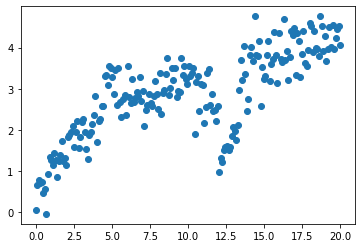

In [5]:
dat.show()

##Create our own test set.

In [6]:
myDat=contValData()

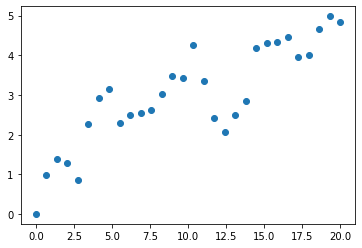

In [7]:
X_test, y_test = myDat.create(1,30)
myDat.show()

#Simple linear regression

##What makes it simple is that it is 1 x and 1 y

In [8]:
class SimpleLinearReg():

  def fit(self,X,y):
    self.y = y
    self.denominator = np.mean(X**2)-np.mean(X)**2
    self.w0 = (np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.denominator
    self.w1 = (np.mean(X*y) - (np.mean(X)*np.mean(y)))/self.denominator

  def predict(self, X, show =0):

    y_hat = self.w1*X + self.w0 #y intersect

    if show:
      plt.figure()
      plt.scatter(X, self.y, s=8)
      # '#FF' RED IS IN HEXADECIMAL F*F = 255 #ff0070
      plt.plot(X, y_hat, color = '#ff0070') 
    return y_hat

In [9]:
slr = SimpleLinearReg()

In [10]:
slr.fit(X,y)

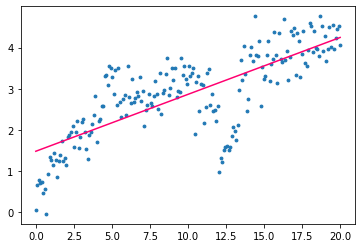

In [11]:
y_hat=slr.predict(X, show = 1)

##Engineer a column ( a target)

In [12]:
y2=y**2

In [13]:
linearReg1 = SimpleLinearReg()
linearReg1.fit(X,y2)

predict using a y_hat2

In [14]:
y_hat2=linearReg1.predict(X)

###Plot **this** (remember it is the sqaure root), not the value you actually want.

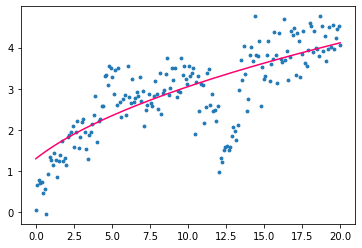

In [15]:
plt.figure()
plt.scatter(X,y,s=8)
plt.plot(X, np.sqrt(y_hat2),color="#ff0070")

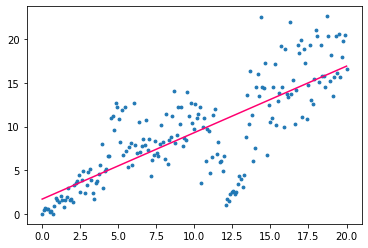

In [16]:
plt.figure()
plt.scatter(X,y**2, s=8)
plt.plot(X, y_hat2, color="#FF0070")

#Can KNN be used for regression?

#We are going to use a radius.



###Define a radius
$radius(V_R) =\vert\vert x_{(k)} - x\vert\vert$

**Create value gamma**
$\gamma_k = \frac{1}{\Vert\X_{(k)}-x\Vert + \epsilon}$

In [45]:
class KNNRegressor():
  def fit(self, X,y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon = 1e-3): # epsilon prevents / 0
    N = len(X) # numOfObs
    y_hat = np.zeros(N) # Empty container for Observations

    # look at every point and each related point to determine # f predictions
    for i in range(N): # for each obeservation in the range of obvservations
      dist2 = np.sum((self.X - X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_K = np.exp(-dist2[idxt]) / np.exp(-dist2[idxt]).sum()
      y_hat[i] = gamma_K.dot(self.y[idxt]) #take the dot product of that with self.y of Nearest Neighbour

    return y_hat


In [47]:
knnr = KNNRegressor()

In [48]:
knnr.fit(X,y)

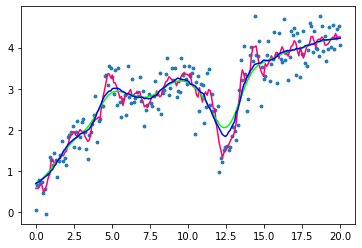

In [51]:
y_hat = knnr.predict(X, 5)
y_hat2 = knnr.predict(X, 40)
y_hat3 = knnr.predict(X, 20)

plt.figure()
plt.scatter(X, y, s=8)
plt.plot(X, y_hat, color="#FF0070")
plt.plot(X, y_hat2, color="#00ff00")
plt.plot(X, y_hat3, color="#0000FF")